In [361]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split

In [239]:
dataset = sns.load_dataset('penguins')

In [240]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [241]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [242]:
numerical_columns = dataset.select_dtypes(include=['float64']).columns

In [243]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[numerical_columns])

In [244]:
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
scaled_df = scaled_df.dropna()

In [245]:
scaled_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


In [246]:
getdummies = pd.get_dummies(dataset, columns=['sex', 'island'])

In [247]:
label_encoder = LabelEncoder()
getdummies['species'] = label_encoder.fit_transform(getdummies['species'])

In [248]:
base_limpa = getdummies.dropna()

In [249]:
base_limpa.isnull().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex_Female           0
sex_Male             0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
dtype: int64

In [250]:
base_limpa['species']

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 342, dtype: int64

In [15]:
inertia = []  
k_range = range(1, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

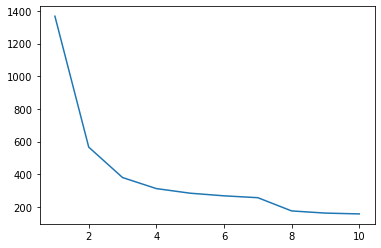

In [16]:
plt.plot(k_range, inertia)

In [17]:
#k proximo a 4 ou 5
inertia

[1368.0,
 565.7076453796292,
 379.3925027555174,
 311.59786254790873,
 283.433727948321,
 267.33668617408654,
 255.9069916779663,
 174.78583986889794,
 161.41734135107052,
 156.47691310262093]

In [18]:
silhouette = []
for k in range(2,11):
    kmeans_s = KMeans(n_clusters=k, random_state=42)
    kmeans_s.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans_s.labels_)
    silhouette.append(score)

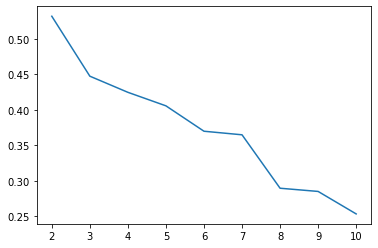

In [19]:
plt.plot(range(2,11), silhouette)

In [20]:
# k proximo a 2 ou 3
silhouette

[0.5315403219473027,
 0.4472192983966046,
 0.42452124267556424,
 0.4054902668996784,
 0.3697725919595356,
 0.3647542513037988,
 0.28958857762840784,
 0.28507537017413853,
 0.2534503234342754]

In [362]:
# escolha do k como 3 por ter boa qualidade nos dois métodos

In [365]:
X = scaled_df
y = base_limpa['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

y_pred = kmeans.predict(X_test)
homogeneity = homogeneity_score(y_test, y_pred)
sil_score = silhouette_score(X_test, y_pred)

print(f'Homogeneidade do modelo KMeans: {homogeneity:.4f}')
print(f'Silhouette Score: {sil_score:.4f}')

Homogeneidade do modelo KMeans: 0.6268
Silhouette Score: 0.4553


In [366]:
from sklearn.cluster import AgglomerativeClustering

In [367]:
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(X_train)

AgglomerativeClustering(n_clusters=3)

In [372]:
y_pred_agg = clustering.fit_predict(X_test)

homogeneity = homogeneity_score(y_test, y_pred_agg)
sil_score = silhouette_score(X_test, y_pred_agg)

print(f'Homogeneidade do modelo Agglomerative Clustering: {homogeneity:.4f}')
print(f'Silhouette Score: {sil_score:.4f}')


Homogeneidade do modelo Agglomerative Clustering: 0.7841
Silhouette Score: 0.4124


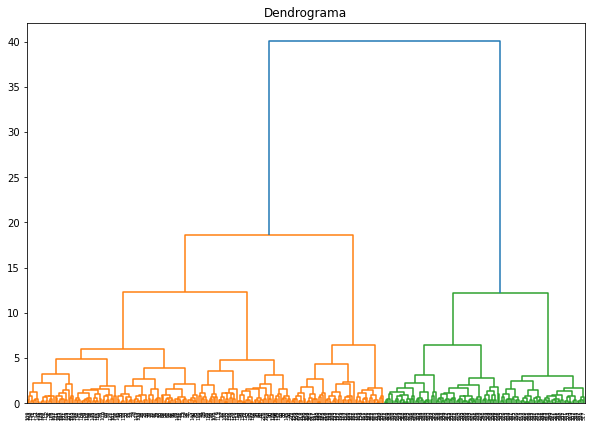

In [369]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Dendrograma')
plt.show()

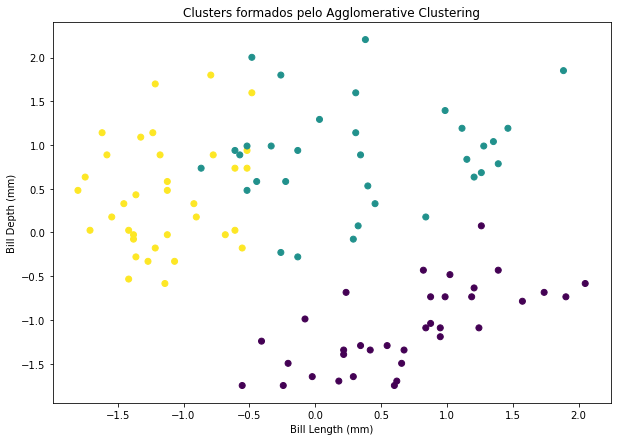

In [370]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_agg)
plt.title('Clusters formados pelo Agglomerative Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

In [296]:
from sklearn.cluster import DBSCAN

In [373]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X_train)
y_pred_db = dbscan.fit_predict(X_test)

In [374]:
mask = y_pred_db != -1
X_test_valid = X_test[mask]
y_pred_valid = y_pred_db[mask]

sil_score_db = silhouette_score(X_test_valid, y_pred_valid)
homogeneity_db = homogeneity_score(y_test, y_pred_db)

In [375]:
print(f'Homogeneidade do modelo DBSCAN: {homogeneity_db:.4f}')
print(f'Silhouette Score: {sil_score_db:.4f}')

Homogeneidade do modelo DBSCAN: 0.6374
Silhouette Score: 0.5384


In [376]:
y_pred_db

array([ 0,  1, -1,  1,  1,  0, -1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,
        1, -1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,
        1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,
        1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,
        1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0])

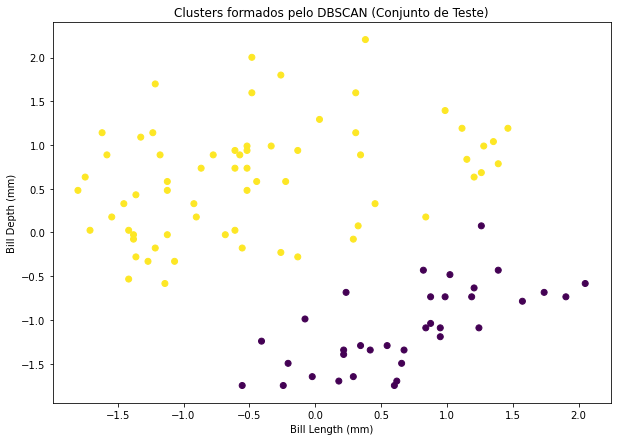

In [378]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test_valid.iloc[:, 0], X_test_valid.iloc[:, 1], c=y_pred_valid, cmap='viridis')
plt.title('Clusters formados pelo DBSCAN (Conjunto de Teste)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

In [357]:
from sklearn.model_selection import KFold

X_scaled = scaled_df.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [358]:
#KMeans
silhouette_scores_kmeans = []
homogeneity_scores_kmeans = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_test = y.iloc[test_index] 
    
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_train)
    y_pred_kmeans = kmeans.predict(X_test)
    
    silhouette_kmeans = silhouette_score(X_test, y_pred_kmeans)
    silhouette_scores_kmeans.append(silhouette_kmeans)

    homogeneity_kmeans = homogeneity_score(y_test, y_pred_kmeans)
    homogeneity_scores_kmeans.append(homogeneity_kmeans)
    
print(silhouette_scores_kmeans, "\n")
print(f'KMeans - Média do Silhouette Score: {np.mean(silhouette_scores_kmeans):.4f}', "\n")
print(homogeneity_scores_kmeans, "\n")
print(f'KMeans - Média do Homogeneity Score: {np.mean(homogeneity_scores_kmeans):.4f}', "\n")

[0.3644598256486746, 0.38310012621271805, 0.5475455025181932, 0.5418010815754146, 0.4960442937466491, 0.4757585702970053, 0.4664339583116322, 0.36931196985088843, 0.3900899724260831, 0.42056259581427263] 

KMeans - Média do Silhouette Score: 0.4455 

[0.7945575790438153, 0.6940894363491171, 0.83716518537655, 1.0, 0.7857577950056677, 0.9141560418036804, 0.9151815407663205, 0.7320012455492031, 0.7775491635392965, 0.8582642774442322] 

KMeans - Média do Homogeneity Score: 0.8309 



In [359]:
#AgglomerativeClustering

silhouette_scores_agg = []
homogeneity_scores_agg = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_test = y.iloc[test_index] 
    
    agg_clust = AgglomerativeClustering(n_clusters=3)
    agg_clust.fit(X_train)
    
    y_pred_agg = agg_clust.fit_predict(X_test)
    
    silhouette_agg = silhouette_score(X_test, y_pred_agg)
    silhouette_scores_agg.append(silhouette_agg)
    
    homogeneity_agg = homogeneity_score(y_test, y_pred_agg)
    homogeneity_scores_agg.append(homogeneity_agg)

print(silhouette_scores_agg, "\n")
print(f'Média do Silhouette Score: {np.mean(silhouette_scores_agg):.4f}', "\n")
print(homogeneity_scores_agg, "\n")
print(f'Média do Homogeneity Score: {np.mean(homogeneity_scores_agg):.4f}', "\n")

[0.42001859880776016, 0.38494554716187446, 0.5475455025181932, 0.5418010815754146, 0.5028511255475019, 0.4832431373745787, 0.46239043293945936, 0.39975495166153097, 0.45425753461136453, 0.43815725172383635] 

Média do Silhouette Score: 0.4635 

[1.0, 0.6691517421764842, 0.8371651853765502, 1.0, 0.74049644168856, 1.0, 0.8929777965720108, 0.6348365681643506, 0.7178094169247771, 0.7408875795161344] 

Média do Homogeneity Score: 0.8233 



In [360]:
#BDScan
silhouette_scores_dbscan = []
homogeneity_scores_dbscan = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_test = y.iloc[test_index] 
    
    dbscan = DBSCAN(eps=0.9, min_samples=5)
    y_pred_dbscan = dbscan.fit_predict(X_test) 
    
    mask = y_pred_dbscan != -1 
    X_test_valid = X_test[mask]
    y_test_valid = y_test.iloc[mask] 
    y_pred_valid = y_pred_dbscan[mask]  
    
    if len(set(y_pred_valid)) > 1:  
        silhouette_dbscan = silhouette_score(X_test_valid, y_pred_valid)
        silhouette_scores_dbscan.append(silhouette_dbscan)
    
        homogeneity_dbscan = homogeneity_score(y_test_valid, y_pred_valid)
        homogeneity_scores_dbscan.append(homogeneity_dbscan)

print(silhouette_scores_dbscan, "\n")
print(f'DBSCAN - Média do Silhouette Score: {np.mean(silhouette_scores_dbscan):.4f}', "\n")
print(homogeneity_scores_dbscan, "\n")
print(f'DBSCAN - Média do Homogeneity Score: {np.mean(homogeneity_scores_dbscan):.4f}', "\n")

[0.5122009171029497, 0.6805633599256341, 0.6869789127304807, 0.5792678289487773, 0.5586002442868463, 0.5807110984744583, 0.4651176961566199, 0.702425057898767, 0.7375410719527747] 

DBSCAN - Média do Silhouette Score: 0.6115 

[0.9999999999999998, 1.0, 1.0, 0.8288767158859701, 1.0, 1.0, 0.7057625817401808, 0.7232050011294177, 1.0] 

DBSCAN - Média do Homogeneity Score: 0.9175 



| **Modelo**                   | **Silhouette Score** | **Homogeneity Score** |
|------------------------------|-------------------------------|--------------------------------|
| **KMeans**                   | 0.4553                       | 0.6268                        |
| **Agglomerative Clustering**  | 0.4124                        | 0.7841                        |
| **DBSCAN**                   |  0.5384                       | 0.6374                        |


- O KMeans apresenta um bom equilíbrio entre separação e consistência, com uma separação moderada entre os clusters (Silhouette Score de 0.4553) e uma homogeneidade razoável (Homogeneity Score de 0.6268), o que significa que ele agrupa pontos semelhantes, mas não de forma perfeitamente consistente. 

- O Agglomerative Clustering tem uma homogeneidade mais alta (0.7841), indicando que seus clusters são mais consistentes com as classes reais, mas sua separação entre clusters é a menor (Silhouette Score de 0.4124). 

- Já o DBSCAN se destaca pela boa separção entre clusters (Silhouette Score de 0.5384), mas sua homogeneidade é razoável (0.6374), sugerindo que, embora o modelo consiga distinguir bem os grupos, a correspondência com as classes reais não é tão forte, possivelmente devido à identificação de pontos de ruído.

##### Com uso de KFold

| **Modelo**                   | **Média do Silhouette Score (KFold)** | **Média do Homogeneity Score (KFold)** |
|------------------------------|---------------------------------------|----------------------------------------|
| **KMeans**                   | 0.4455                                | 0.8309                                 |
| **Agglomerative Clustering**  | 0.4635                                | 0.8233                                 |
| **DBSCAN**                   | 0.6115                                | 0.9175                                 |


- DBSCAN se destaca tanto no Silhouette Score (qualidade da separação entre os clusters) quanto em Homogeneity Score (se os dados nos clusters pertencem a mesma classe), indicando que é o modelo mais eficaz entre os três no que diz respeito à separação dos clusters e à consistência com os rótulos reais.

- KMeans e Agglomerative Clustering têm desempenhos muito próximos em termos de homogeneidade, mas Agglomerative Clustering tem uma ligeira vantagem em termos de Silhouette Score, sugerindo que seus clusters estão ligeiramente melhor separados.

- KMeans, embora tenha um bom Homogeneity Score, tem a menor média de Silhouette Score, o que sugere que a separação entre os clusters não é tão boa quanto nos outros dois modelos.

Referências:

- https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness
- https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient